In [752]:
import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option("display.max_colwidth",None)
pd.set_option("display.max_rows", None)
# %load_ext nb_mypy

In [ ]:
!pip install nb_mypy

In [38]:
from io import StringIO
import pandas as pd

TESTDATA = StringIO("""col1;col2;col3
    1;4.4;99
    2;4.5;200
    3;4.7;65
    4;3.2;140
    """)
test2 = StringIO("""Date,Rep
'2020-09-21', 'cusip1'
'2021-09-21', 'cusip1'
'2022-09-21', 'cusip2'
'2022-03-21', 'cusip2'
'2022-09-21', 'cusip3'
'2023-09-21', 'cusip3'
'2023-09-21', 'cusip3'
""")

df = pd.read_csv(test2, sep=",")
df.columns

Index(['Date', 'Rep'], dtype='object')

<AxesSubplot:xlabel='Date'>

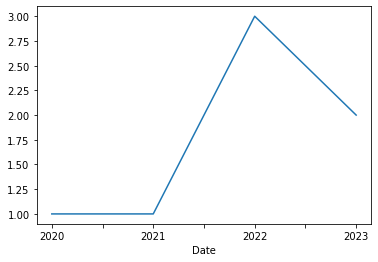

In [55]:
# df.groupby((pd.to_datetime(df['Date']).dt.strftime('%b-%Y')["Rep"].size().plot()

df.groupby(pd.to_datetime(df['Date']).dt.strftime('%Y'), sort=False)['Rep'].size().plot(kind='line')

## pandas `pipe`
#### `pipe` lets me to chain different transformations on the `df` I'm working on. I can create a pipeline of functions where a `raw df` comes in and a `transformed df` comes out

In [147]:
%%time

from pathlib import Path
import pandas as pd
from typing import List
import glob

processed_tables_csv = Path(r"E:\app_data\dropbox_13f_files\processed_tables\processed_tables\2230")
df = (pd.concat((pd.read_csv(file, parse_dates=['rdate', 'fdate']) for file in glob.glob(f"{processed_tables_csv}/*.csv"))))

def to_upper(df: pd.DataFrame,column_name: str) -> pd.DataFrame:
    df[column_name] = df[column_name].astype(str).str.upper()
    return df

def to_lower(df: pd.DataFrame,column_name: str) -> pd.DataFrame:
    df[column_name] = df[column_name].astype(str).str.lower()
    return df

def new_names(df: pd.DataFrame,new_fdate: str, new_rdate: str) -> pd.DataFrame:
    df = df.rename(columns={'fdate': new_fdate, 'rdate': new_rdate})
    return df

def add_columns(df: pd.DataFrame, list_of_new_columns: List) -> pd.DataFrame:
    df = df.rename(columns={'fdate': new_fdate, 'rdate': new_rdate})
    return df

def fill_missing_values(df):
   for col in df.select_dtypes(exclude= ["int","float"]).columns:
      # val = df[col].mean()
      val = "NO_DATA"
        
      df[col].fillna(val, inplace=True)
   return df
                    
result = to_upper(df, 'cusip8')
result2 = to_lower(df, 'cusip9')
result3 = new_names(df, 'repoooort_date', 'ferral_date')
# files = open_files(r'{processed_tables_csv}\*.csv')
# df = pd.concat((pd.read_csv(f) for f in all_files))


CPU times: total: 422 ms
Wall time: 414 ms


In [143]:
# result
result3.sample(3)

<cell>2: error: Name "result3" is not defined


,cusip8,cusip9,shrsOrPrnAmt,putCall,investmentDiscretion,remainder,value,shares,permno,prc,shrout,split,deviation,address,ferral_date,repoooort_date,cik,form,type,num3,nameOfIssuer,titleOfClass,votingAuthority,in_universe,otherManager
174,86791410,867914103,SH,NaN,SOLE,NaN,24962,378100.0,68144.0,66.019997,464827.0,False,0.001,2230/0001144204-18-040186.txt,2018-06-30,2018-07-26,2230,13F-HR,xml,NaN,"SunTrust Banks, Inc.",COM,37810000.0,True,NaN
47,57708110,577081102,SH,NaN,SOLE,"11,080 575,000",11080,575000.0,39538.0,19.270000,429886.0,False,0.001,2230/0000002230-04-000014.txt,2003-12-31,2004-02-02,2230,13F-HR,fwf,NaN,NaN,NaN,NaN,NaN,NaN
66,58550910,585509102,SH,NaN,SOLE,"14,779 210,000",14779,210000.0,59379.0,70.375000,261793.0,False,0.001,2230/0000002230-99-000007.txt,1999-03-31,1999-05-17,2230,13F-HR,fwf,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
df_transformed = (df.pipe(to_upper, 'cusip8')
                  .pipe(to_lower, 'cusip9')
                  .pipe(new_names, 'ffff', 'rrrrr')
                  .pipe(fill_missing_values))


<cell>1: error: Name "df" is not defined
<cell>1: error: Name "to_upper" is not defined
<cell>2: error: Name "to_lower" is not defined
<cell>3: error: Name "new_names" is not defined
<cell>4: error: Name "fill_missing_values" is not defined


In [149]:
df_transformed.sample(5)
# df_transformed.select_dtypes(exclude= ["int","float"]).columns

,cusip8,cusip9,shrsOrPrnAmt,putCall,investmentDiscretion,remainder,value,shares,permno,prc,shrout,split,deviation,address,rrrrr,ffff,cik,form,type,num3,nameOfIssuer,titleOfClass,votingAuthority,in_universe,otherManager
6,00423910,004239109,SH,NO_DATA,DFND,NO_DATA,480,20200.0,79235.0,23.760000,81553.0,False,0.001000,2230/0001144204-19-008131.txt,2018-12-31,2019-02-14,2230,13F-HR,xml,NaN,Acadia Realty Trust,COM,20200.0,True,NaN
26,04532710,045327103,SH,NO_DATA,DFND,NO_DATA,334,3200.0,80957.0,104.260002,69109.0,False,0.001001,2230/0001144204-19-021569.txt,2019-03-31,2019-04-26,2230,13F-HR,xml,NaN,"Aspen Technology, Inc.",COM,3200.0,True,NaN
28,19851610,198516106,SH,NO_DATA,SOLE,"10,672 200,000",10672,200000.0,85863.0,53.360001,34075.0,False,0.001000,2230/0000002230-13-000028.txt,2012-12-31,2013-02-14,2230,13F-HR,fwf,NaN,NO_DATA,NO_DATA,NaN,NO_DATA,NaN
41,40411910,404119109,SH,NO_DATA,SOLE,"15,031 390,000",15031,390000.0,76171.0,38.540001,494024.0,False,0.001000,2230/0000002230-02-000002.txt,2001-12-31,2002-02-08,2230,13F-HR,fwf,NaN,NO_DATA,NO_DATA,NaN,NO_DATA,NaN
1,00206R10,00206r102,SH,NO_DATA,SOLE,NO_DATA,18951,539000.0,66093.0,35.160000,5268000.0,False,0.001000,2230/0000002230-14-000035.txt,2013-12-31,2014-02-14,2230,13F-HR,xml,NaN,AT&T CORP.,COM,53900000.0,True,NaN


In [152]:
df_transformed['putCall_encoded'] = pd.factorize(df_transformed.putCall)[0]
df_transformed['putCall_encoded'].value_counts()

<cell>1: error: Name "pd" is not defined


0    9124
2     149
1     129
Name: putCall_encoded, dtype: int64

In [196]:
%%time
subset = df_transformed.loc[df_transformed['putCall'] == 'NO_DATA',['cusip8']]
subset.cusip8.head(3).squeeze()
# .sample(4)
                       

CPU times: total: 0 ns
Wall time: 0 ns


0    00282410
1    02261510
2    02313910
Name: cusip8, dtype: object

In [180]:
df_transformed.loc[df_transformed.ffff.between('1999-01-01', '1999-05-31', inclusive="both")].sample(3)

,cusip8,cusip9,shrsOrPrnAmt,putCall,investmentDiscretion,remainder,value,shares,permno,prc,shrout,split,deviation,address,rrrrr,ffff,cik,form,type,num3,nameOfIssuer,titleOfClass,votingAuthority,in_universe,otherManager,putCall_encoded
48,39538410,395384100,SH,NO_DATA,SOLE,"14,769 425,000",14769,425000.0,80127.0,34.750,108873.0,False,0.001,2230/0000002230-99-000007.txt,1999-03-31,1999-05-17,2230,13F-HR,fwf,NaN,NO_DATA,NO_DATA,NaN,NO_DATA,NaN,0
101,87237510,872375100,SH,NO_DATA,SOLE,"5,963 300,000",5963,300000.0,37161.0,19.875,131957.0,False,0.001,2230/0000002230-99-000007.txt,1999-03-31,1999-05-17,2230,13F-HR,fwf,NaN,NO_DATA,NO_DATA,NaN,NO_DATA,NaN,0
84,71654910,716549100,SH,NO_DATA,SOLE,"37,374 1,145,570",37374,1145570.0,18964.0,32.625,13841.0,False,0.001,2230/0000002230-99-000007.txt,1999-03-31,1999-05-17,2230,13F-HR,fwf,NaN,NO_DATA,NO_DATA,NaN,NO_DATA,NaN,0


In [197]:
df_transformed.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
value,9402.0,1.299787e+04,1.288646e+04,42.000000,4.463750e+03,1.108500e+04,1.732975e+04,1.536950e+05
shares,9402.0,3.173323e+05,5.798862e+05,400.000000,6.600000e+04,2.000000e+05,3.800000e+05,1.000000e+07
permno,9010.0,5.309459e+04,3.069031e+04,10078.000000,2.048200e+04,5.948300e+04,8.333200e+04,9.343600e+04
prc,9010.0,7.498232e+01,1.390626e+02,0.360000,2.845000e+01,4.811000e+01,7.716750e+01,4.083120e+03
shrout,9010.0,1.120376e+06,1.895632e+06,3702.000000,9.310525e+04,3.567005e+05,1.196690e+06,1.700180e+07
deviation,9010.0,1.111843e-03,1.052501e-02,0.000099,9.999783e-04,1.000000e-03,1.000020e-03,1.000000e+00
cik,9402.0,2.230000e+03,0.000000e+00,2230.000000,2.230000e+03,2.230000e+03,2.230000e+03,2.230000e+03
num3,3.0,1.833333e+05,1.588500e+05,0.000000,1.350000e+05,2.700000e+05,2.750000e+05,2.800000e+05
votingAuthority,4311.0,1.556444e+07,2.514305e+07,400.000000,1.505000e+06,8.500000e+06,2.000000e+07,2.186774e+08
otherManager,1215.0,7.242798e-01,4.470605e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [209]:
df_transformed.describe().T.drop("count", axis=1)\
              .style.background_gradient(subset=['mean', "50%"], cmap="Reds")
# .style.highlight_max(color="darkred")\

,mean,std,min,25%,50%,75%,max
value,12997.870028,12886.460377,42.000000,4463.750000,11085.000000,17329.750000,153695.000000
shares,317332.306743,579886.229411,400.000000,66000.000000,200000.000000,380000.000000,10000000.000000
permno,53094.593008,30690.309841,10078.000000,20482.000000,59483.000000,83332.000000,93436.000000
prc,74.982319,139.062598,0.360000,28.450001,48.109999,77.167500,4083.120117
shrout,1120375.650943,1895632.481344,3702.000000,93105.250000,356700.500000,1196690.000000,17001802.000000
deviation,0.001112,0.010525,0.000099,0.001000,0.001000,0.001000,1.000000
cik,2230.000000,0.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
num3,183333.333333,158850.034099,0.000000,135000.000000,270000.000000,275000.000000,280000.000000
votingAuthority,15564443.899559,25143049.079446,400.000000,1505000.000000,8500000.000000,20000000.000000,218677400.000000
otherManager,0.724280,0.447060,0.000000,0.000000,1.000000,1.000000,1.000000


In [212]:
import numpy as np
# df_transformed.select_dtypes(include=np.number).head()
# df_transformed.select_dtypes(exclude=np.number).head()
df_transformed.select_dtypes(include=['int', 'float']).head()


,value,shares,permno,prc,shrout,deviation,cik,num3,votingAuthority,otherManager,putCall_encoded
0,9260,255000.0,20482.0,36.3125,1537311.0,0.001,2230,NaN,NaN,NaN,0
1,11772,340000.0,64856.0,34.6250,102125.0,0.001,2230,NaN,NaN,NaN,0
2,19810,379600.0,76757.0,52.1875,69920.0,0.001,2230,NaN,NaN,NaN,0
3,783,15000.0,NaN,NaN,NaN,NaN,2230,NaN,NaN,NaN,1
4,16681,425000.0,15667.0,39.2500,1306656.0,0.001,2230,NaN,NaN,NaN,0


In [242]:
# Create sample data
ages = pd.Series(['green', 'blue', 'no data', 'yellow', '', 'no data', None, 'white']).to_frame("ages")
# print(ages.convert_dtypes().dtypes.value_counts(normalize=True))
ages

<cell>2: error: Name "pd" is not defined


,ages
0,green
1,blue
2,no data
3,yellow
4,
5,no data
6,None
7,white


In [251]:
ages2 = ages.mask(cond=~ages["ages"].isin(['green', 'blue', 'yellow', 'white']), other=np.nan)
ages2.ages.value_counts(dropna=False, normalize=True)

NaN       0.500
green     0.125
blue      0.125
yellow    0.125
white     0.125
Name: ages, dtype: float64

In [278]:
# print(ages2.ages.value_counts())
      # .memory_usage()
      # ,ages2.convert_dtypes().memory_usage()
ages2.ages.values

array(['green', 'blue', nan, 'yellow', nan, nan, nan, 'white'],
      dtype=object)

In [275]:
# %%time
# index = pd.date_range("2021-08-01", periods=100, freq="H")
# data = pd.DataFrame({"col": list(range(100))}, index=index)

# data.head()

# index = pd.DataFrame(range(100))

quarter = pd.date_range("1999-01-01", '2020-01-01', freq="Q").to_period('Q')
# data = pd.DataFrame({"quarter": quarter}, index=range(84))
df = pd.DataFrame(np.nan, index=range(84), columns=['A', 'B'])

data.head(10)

<cell>9: error: Name "pd" is not defined
<cell>11: error: Name "pd" is not defined


AttributeError: 'bool' object has no attribute 'sum'

In [288]:
# Create a sample df 
# print("Contains random values")
# df1 = pd.util.testing.makeDataFrame(); df1.sample(4) # contains random values
# print("Contains missing values")
# df2 = pd.util.testing.makeMissingDataframe(); df2.sample(4) # contains missing values
# print("Contains datetime values")
# df3 = pd.util.testing.makeTimeDataFrame(); df3.sample(4) # contains datetime values
print("Contains mixed values")
df4 = pd.util.testing.makeMixedDataFrame(); df4.head() # contains mixed values


<cell>9: error: Name "pd" is not defined


Contains mixed values


,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


In [329]:
# Create a sample df by providing index and columns names
index = ["Diamonds", "Titanic", "Iris", "Heart Disease", "Loan Default"]
libraries = ["XGBoost", "CatBoost", "LightGBM", "Sklearn GB"]

sample_df = pd.DataFrame(
    {lib: np.random.normal(90, 180, 5) for lib in libraries}, index=index
)
# sample_df = pd.DataFrame(
#     {lib: np.random.uniform(90, 180, 5) for lib in libraries}, index=index
# )

sample_df

<cell>5: error: Name "pd" is not defined


,XGBoost,CatBoost,LightGBM,Sklearn GB
Diamonds,99.145396,201.096560,52.399038,249.325410
Titanic,-24.659216,144.030658,195.592174,-45.791629
Iris,124.364787,26.595028,241.017014,315.516268
Heart Disease,468.045925,-115.653276,257.598375,182.327368
Loan Default,111.628611,27.118310,141.405719,36.343290


In [ ]:
# !pip install pandasvault
import pandasvault as pv

# """TABLE PROCESSING"""
# sample_df = pv.list_shuff(["LightGBM","CatBoost","XGBoost"],sample_df)
# sample_df = pv.reduce_mem_usage(sample_df)

"""TABLE EXPLORATION"""
# sample_df = pv.corr_list(sample_df)
# sample_df
sample_df = pv.missing_data(sample_df)
sample_df

<cell>11: error: Cannot determine type of "sample_df"


ERROR! Session/line number was not unique in database. History logging moved to new session 734


In [299]:
sample_df

XGBoost   Sklearn GB    0.691746
LightGBM  CatBoost      0.164117
CatBoost  XGBoost       0.056022
LightGBM  XGBoost      -0.284626
          Sklearn GB   -0.599136
CatBoost  Sklearn GB   -0.614279
dtype: float64

In [295]:
np.random.seed(1)
"""quick way to create a data frame for testing""" 
df_test = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd']) \
    .assign(target=lambda x: (x['b']+x['a']/x['d'])*x['c'])

df_test

<cell>3: error: Name "pd" is not defined


,a,b,c,d,target
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032


In [297]:
df_test2 = df_test.copy()
df_test2["number"] = [3,10,1]
df_test2

,a,b,c,d,target,number
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,3
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409,10
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032,1


In [314]:
df_out = (
  df_test2.style.format({"a":"${:.2f}", "target":"${:.5f}"})
 .hide(axis=0)
 .highlight_min("a", color ="red")
 .highlight_max("a", color ="green")
 .background_gradient(subset = "target", cmap ="Blues")
 .bar("number", color = "lightblue", align = "zero")
 .set_caption("DF with different stylings")
) ; df_out


a,b,c,d,target,number
$1.62,-0.611756,-0.528172,-1.072969,$1.12270,3
$0.87,-2.301539,1.744812,-0.761207,$-5.99941,10
$0.32,-0.249370,1.462108,-2.060141,$-0.59103,1


In [342]:
sample_df_out =(
    sample_df.style.format({'XGBoost': '${:.1f}', 'CatBoost': '${:.2f}', 'LightGBM': '${:.3f}' })
             # .hide(axis=0)
             # .highlight_min("XGBoost", color="coral")
             # .highlight_max("XGBoost", color="turquoise")
               .bar('XGBoost', color='lightblue', align='zero')
               .set_caption('DF formating training')
             # .background_gradient(subset='Sklearn GB', cmap='Greens')
             # .background_gradient(subset='Sklearn GB', axis=1) # comparison between columns of the same row
             # .background_gradient(axis=0) # comparison between rows of the same column
             # .background_gradient(axis=None) # comparison across all cells
             # .background_gradient(axis=0, gmap=sample_df['Sklearn GB'], cmap='YlOrRd') # colors entire row, but based on value of one column
             # .background_gradient(axis=0, cmap='YlOrRd')
)
sample_df_out
    

,XGBoost,CatBoost,LightGBM,Sklearn GB
Diamonds,$99.1,$201.10,$52.399,249.325410
Titanic,$-24.7,$144.03,$195.592,-45.791629
Iris,$124.4,$26.60,$241.017,315.516268
Heart Disease,$468.0,$-115.65,$257.598,182.327368
Loan Default,$111.6,$27.12,$141.406,36.343290


#### Lower Case Columns

In [350]:

## Lower-case all DataFrame column names 
df_test3 = df_test.copy() ; df_test3
df_test3.columns = ["A","BGs","c","dag","Target"]
df_test3

,A,BGs,c,dag,Target
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032


In [354]:
df_test3.columns # ['A', 'BGs', 'c', 'dag', 'Target']
df_test3.columns = map(str.lower, df_test3.columns); df_test3

,a,bgs,c,dag,target
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032


#### >>> Front and Back Column Selection

In [356]:
df_test4 = df_test.copy() ; df_test4

,a,b,c,d,target
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032


In [ ]:
df_test4.iloc[:, :n]

In [366]:
def front(self, n):
    return self.iloc[:, :n]

def back(self:pd.DataFrame, n:int) -> pd.DataFrame:
    return self.iloc[:, -n:]

<cell>4: error: Name "pd" is not defined


In [370]:
pd.back = back
pd.front = front

# pd.back(df_test4, 2)
pd.front(df_test4, 3)

<cell>1: error: Name "pd" is not defined
<cell>2: error: Name "pd" is not defined
<cell>5: error: Name "pd" is not defined


,a,b,c
0,1.624345,-0.611756,-0.528172
1,0.865408,-2.301539,1.744812
2,0.319039,-0.249370,1.462108


#### >>> Fast Data Frame Split

In [381]:
df_test5 = df_test.copy()
df_test5
df_test

,a,b,c,d,target
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032


In [379]:
# test = df_test5.sample(frac=0.4); test
# df_test5, test
train = df_test5[~df_test5.isin(test)].dropna(); train

,a,b,c,d,target
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409


#### >>> Create Features and Labels List

In [382]:
df_test6 = df_test.head()
y = 'target'
X = [name for name in df_test5.columns if name not in [y, 'd']]
print('y =', y)
print('X =', X)


y = target
X = ['a', 'b', 'c']


#### >>> Short Basic Commands

In [398]:
df_test7 = df_test.copy()
df_test7['category'] = np.where(df_test7['target']>1, '1', '0'); df_test7
df_test7['k'] = df_test7['category'].astype(str) + ': ' + df_test7['d'].round(1).astype(str); df_test7

,a,b,c,d,target,category,k
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409,0,0: -0.8
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032,0,0: -2.1


In [399]:
df_test7 = pd.concat([df_test7, df_test7], ignore_index=True); df_test7.head()

<cell>1: error: Name "pd" is not defined
<cell>1: error: Cannot determine type of "df_test7"


,a,b,c,d,target,category,k
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409,0,0: -0.8
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032,0,0: -2.1
3,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1
4,0.865408,-2.301539,1.744812,-0.761207,-5.999409,0,0: -0.8


In [401]:
"""set display width, col_width etc for interactive pandas session""" 
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)

<cell>2: error: Name "pd" is not defined
<cell>3: error: Name "pd" is not defined
<cell>4: error: Name "pd" is not defined


In [596]:
"""when you have an excel sheet with spaces in column names"""
df_test7 = df_test.copy()
df_test7['category'] = np.where(df_test7['target']>1, '1', '0'); df_test7
df_test7['k'] = df_test7['category'].astype(str) + ': ' + df_test7['d'].round(1).astype(str); df_test7
df_test7['spliT Name'], df_test7['split name'] = df_test7['category'], df_test7['category']

df_test7.columns = [column.lower().replace(' ', '_') for column in df_test7.columns]
df_test7
df_test7 = df_test7.iloc[:, :-1]
df_test7

,a,b,c,d,target,category,k,split_name
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1,1
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409,0,0: -0.8,0
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032,0,0: -2.1,0


In [481]:
df_test7.columns = [column.upper() for column in df_test7.columns]; df_test7

,A,B,C,D,TARGET,CATEGORY,K,SPLIT_NAME
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1,1
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409,0,0: -0.8,0
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032,0,0: -2.1,0


In [482]:
df_test7.columns = [column.replace("C", "WOBBLE") for column in df_test7.columns]; df_test7


,A,B,WOBBLE,D,TARGET,WOBBLEATEGORY,K,SPLIT_NAME
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1,1
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409,0,0: -0.8,0
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032,0,0: -2.1,0


In [483]:
df_test7.columns = [column.replace("WOBBLE", "_") for column in df_test7.columns]; df_test7

,A,B,_,D,TARGET,_ATEGORY,K,SPLIT_NAME
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1,1
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409,0,0: -0.8,0
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032,0,0: -2.1,0


In [484]:
df_test7.columns = [column.replace("_", "C").lower() for column in df_test7.columns]; df_test7

,a,b,c,d,target,category,k,splitcname
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1,1
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409,0,0: -0.8,0
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032,0,0: -2.1,0


In [513]:
## Add prefix to all the columns
df_test7.add_prefix("left_")


,left_a,left_b,...,left_k,left_splitcname
0,1.624345,-0.611756,...,1: -1.1,1
1,0.865408,-2.301539,...,0: -0.8,0
2,0.319039,-0.249370,...,0: -2.1,0


In [534]:
# df_test7 = df_test7.add_suffix("_poo")
# df_test7.columns = [column.replace("_poo_poo", "").lower() for column in df_test7.columns]
df_test7
# df_test7.category = df_test7.category.replace("0", pd.NA)

,a,b,c,d,target,category,k,split_name
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1,1
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409,<NA>,0: -0.8,0
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032,<NA>,0: -2.1,0


In [711]:
## set display options
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', None) # width of one column
pd.set_option('display.max_columns', 15) # max columns to display df
pd.set_option('display.max_rows', 50)

In [540]:

df_test7.dropna(thresh=len(df)*0.50, axis='columns')

""
0
1
2


In [547]:
## filtert df by values present in one of the columns/serie
df_test7[df_test7['split_name'].isin(['1'])]
df_test7[df_test7['split_name'].isin(df_test7.split_name.tail(1))]

,a,b,c,d,target,category,k,split_name
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409,<NA>,0: -0.8,0
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032,<NA>,0: -2.1,0


In [556]:
"""filter by multiple conditions in a dataframe df"""
df_test7[(df_test7.a < 0.9) & (df_test7.split_name == '0')]

"""filter by multiple conditions AND change value of one or multiple columns"""

df_test7.loc[(df_test7.a < 0.9) & (df_test7.split_name == '0'), 'a'] = 0.5
df_test7.loc[(df_test7.a < 0.9) & (df_test7.split_name == '0'), ['a', 'b']] = 0.5, 1

In [560]:
"""filter by conditions on rows and the condition index"""

df_test7[(df_test7.a >= 0.5) & (df_test7.index.isin([1, 0]))]

,a,b,c,d,target,category,k,split_name
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1,1
1,0.500000,1.000000,1.744812,-0.761207,-5.999409,<NA>,0: -0.8,0


In [561]:
df_test7[(df_test7.category.isna()) & (df_test7.index.isin([1, 0]))]

,a,b,c,d,target,category,k,split_name
1,0.5,1.0,1.744812,-0.761207,-5.999409,<NA>,0: -0.8,0


In [558]:
df_test7

,a,b,c,d,target,category,k,split_name
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1,1
1,0.500000,1.000000,1.744812,-0.761207,-5.999409,<NA>,0: -0.8,0
2,0.500000,1.000000,1.462108,-2.060141,-0.591032,<NA>,0: -2.1,0


In [563]:
df_test7['make'] = pd.Series(['bmw', 'mercedes', 'audi'])
df_test7['category'] = pd.Series(['1', '0', '0'])
df_test7

,a,b,c,d,target,category,k,split_name,make
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1,1,bmw
1,0.500000,1.000000,1.744812,-0.761207,-5.999409,0,0: -0.8,0,mercedes
2,0.500000,1.000000,1.462108,-2.060141,-0.591032,0,0: -2.1,0,audi


In [577]:
%%time
"""regexp filters on strings (vectorized), use .* instead of *"""
# df_test7[df_test7.category.str.contains(r'.*[1-9].*')]
# df_test7[df_test7.make.str.contains(r'.*[ie].*')] # regex: check if the valule has a letter i or e in it
# df_test7[df_test7.make.str.contains(r'[au].*')]

## logical NOT
df_test7[~df_test7.make.str.contains(r'[au].*')]

CPU times: total: 0 ns
Wall time: 0 ns


,a,b,c,d,target,category,k,split_name,make
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,1,1: -1.1,1,bmw
1,0.500000,1.000000,1.744812,-0.761207,-5.999409,0,0: -0.8,0,mercedes


In [582]:
"""creating complex filters using functions on rows"""
# df_test7[(df_test7.a < 0.9) & (df_test7.split_name == '0')]
df_test7[df_test7.apply(lambda x: x['d'] < x['target'], axis=1)  ]  # condition based on caparison between different colulmns

df_test7[df_test7.apply(lambda x: x.index == 2, axis=0)  ]  # working with index - I need more practice and understanding of this

,a,b,c,d,target,category,k,split_name,make
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.5,1.0,1.462108,-2.060141,-0.591032,0,0: -2.1,0,audi


In [614]:
"""Pandas replace or assign value operation"""
# df_test7['a'] = df_test7.a.round(2).replace(1.60, 17) # option 1
df_test7.loc[df_test7['a'] <1, 'a' ] = 19  # option 2


In [623]:
"""Conditionals and selectors"""
# df_test7.loc[(df_test7['b'] < -0.7) & (df_test7['target'] < 1), ['a', 'b', 'target']] # conditions, selection

df_test7.loc[(df_test7['b'] < -0.7) & (df_test7['target'] < 1), ['a', 'b', 'target']] = 20, -1, -6 # condition, selection and multiple values setting

In [628]:
"""Selecting multiple column slices"""
df_test7.iloc[:, np.r_[0:2, 4:5]] # selecting two ranges of columns. Result: 0, 1, 4
df_test7.iloc[:, np.r_[0:2, 4:5, -1]]
df_test7.iloc[:, np.r_[0:2, 3:4, -3:-1]]

,a,b,d,category,k
0,19.0,-0.611756,-1.072969,1,1: -1.1
1,20.0,-1.000000,-0.761207,0,0: -0.8
2,19.0,-0.249370,-2.060141,0,0: -2.1


In [642]:
"""apply and map examples"""
# df_test7[['a', 'b', 'c']].applymap(lambda x: x+1)
df_test7[['make']].applymap(lambda x: len(x))

,make
0,3
1,8
2,4


In [646]:
"""add 2 to row 3 and return the series"""
df_test7[['a', 'b', 'c']].apply(lambda x: x[0]+2, axis=0) # selecting row with index 0 and adding 2 to cells in columns a, b, c. 
## the result is three values presnted as a series

df_test7[['a', 'b', 'c']].apply(lambda x: x[0]+x[2], axis=0) # selecting rows 0 and 2 and summing up columns a,b, c

a    38.000000
b    -0.861127
c     0.933936
dtype: float64

In [648]:
"""add 3 to col A and return the series"""
# df_test7[['a']].apply(lambda x: x+3, axis=1)
df_test7.apply(lambda x: x['a']+3, axis=1)

0    22.0
1    23.0
2    22.0
dtype: float64

In [649]:
"""appending something to a string column"""

df_test7.apply(lambda x: x['make']+"_", axis=1)

0         bmw_
1    mercedes_
2        audi_
dtype: object

In [701]:
""" Split delimited values in a DataFrame column into two new columns """
df_test7['new1'], df_test7['new2'] = zip(*df_test7['k'].apply(lambda x: x.split(": ", 1)))

In [702]:
# df_test7 = df_test.copy()
# df_test7['make'] = pd.Series(['bmw', 'mercedes', 'audi'])
# df_test7['category'] = pd.Series(['1', '0', '0'])
# df_test7['k'] = df_test7['category'].astype(str) + ': ' + df_test7['d'].round(1).astype(str)

# df_test7['k'] = df_test7['k'].str.replace(".", ": ")
df_test7

,a,b,c,d,target,make,category,k,new1,new2
0,1.624345,-0.611756,-0.528172,-1.072969,1.122701,bmw,1,1: -1: 1,1,-1: 1
1,0.865408,-2.301539,1.744812,-0.761207,-5.999409,mercedes,0,0: -0: 8,0,-0: 8
2,0.319039,-0.249370,1.462108,-2.060141,-0.591032,audi,0,0: -2: 1,0,-2: 1


In [700]:
df_test7['k'].apply(lambda x: x.split(": ", 2))

0    [1, -1, 1]
1    [0, -0, 8]
2    [0, -2, 1]
Name: k, dtype: object

In [882]:
## set display options
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 12) # width of one column
pd.set_option('display.max_columns', 15) # max columns to display df
pd.set_option('display.max_rows', 50)

In [ ]:
# columns = ['cusip', 'quarter', 'tr_id', 'tr_type', 'tr_value', 'tr_shares', '13f_price', 'value', 'shares']
# df_clip = pd.read_clipboard(header=None, names=columns)
# df_clip = df_clip.sort_values(['tr_id','quarter'], ascending=True)


# df_clip['open'] = df_clip.groupby(['tr_id'])['13f_price'].transform('first')
# df_clip['max'] = df_clip.groupby(['tr_id'])['13f_price'].transform('max')
# df_clip['min'] = df_clip.groupby(['tr_id'])['13f_price'].transform('min')
# df_clip['close'] = df_clip.groupby(['tr_id'])['13f_price'].transform('last')

# df_clip['change_close_open'] = (((df_clip['close'] / df_clip['open']) - 1)*100).round(2)
# df_clip['change_max_open'] = (((df_clip['max'] / df_clip['open']) - 1)*100).round(2)
# df_clip['change_min_open'] = (((df_clip['min'] / df_clip['open']) - 1)*100).round(2)
# df_clip['change_quarter_open'] = (((df_clip['13f_price'] / df_clip['open']) - 1)*100).round(2)



# df_clip = df_clip.drop(columns=['pnl'])
df_clip

In [892]:
# !pip install flytekit
# !!! while installing it I got an error on arrow 7.0.0 it might have been uninstalled. MAKE SURE EVERYTHING WORKS as I rely very heavily on parquet/arrow


In [ ]:
%%time
from flytekit import task, workflow

@task
def greet(name: str) -> str:
    return f"Welcome, {name}!"

@task
def add_question(greeting: str) -> str:
    return f"{greeting} How are you?"

@workflow
def welcome(name: str) -> str:
    greeting = greet(name=name)
    return add_question(greeting=greeting)

welcome(name="Traveller")
# Output: "Welcome, Traveller! How are you?"

In [2]:
k = 2000
print(f"in minutes it's: {k/60 :0.2f} min")

in minutes it's: 33.33 min


In [6]:
import vegafusion as vf
# vf.jupyter.disable()
vf.jupyter.disable()

In [7]:
import altair as alt
from vega_datasets import data

source = data.seattle_weather()
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='month(date):O',
    y='mean(precipitation):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(precipitation):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

chart = alt.layer(bars, line, data=source)
chart

alt.LayerChart(...)